# Разведочный анализ данных - Ирисы

[Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0) — набор данных для задачи классификации, на примере которого Рональд Фишер в 1936 году продемонстрировал работу разработанного им метода дискриминантного анализа. Иногда его также называют ирисами Андерсона, так как данные были собраны американским ботаником Эдгаром Андерсоном. Этот набор данных стал классическим и часто используется в литературе для иллюстрации работы различных статистических алгоритмов.

Ирисы Фишера состоят из данных о 150 экземплярах ириса, по 50 экземпляров из трёх видов — Ирис щетинистый (Iris setosa), Ирис виргинский (Iris virginica) и Ирис разноцветный (Iris versicolor). Для каждого экземпляра измерялись четыре характеристики (в сантиметрах):

- Длина наружной доли околоцветника (англ. sepal length);
- Ширина наружной доли околоцветника (англ. sepal width);
- Длина внутренней доли околоцветника (англ. petal length);
- Ширина внутренней доли околоцветника (англ. petal width).

На основании этого набора данных требуется построить правило классификации, определяющее вид растения по данным измерений. Это задача многоклассовой классификации, так как имеется три класса — три вида ириса.

Один из классов (Iris setosa) линейно-разделим от двух остальных.

[дополнительно почитать](https://neerc.ifmo.ru/wiki/index.php?title=%D0%9E%D0%B1%D1%89%D0%B8%D0%B5_%D0%BF%D0%BE%D0%BD%D1%8F%D1%82%D0%B8%D1%8F)

В качестве задания вам предлагается повторить данные действия для набора данных
- [User Knowledge Modeling Data Set](http://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)



In [ ]:
# Подключаем библиотеки
import pandas as pd # Работа с набором данных
import numpy as np # Линейная алгебра
# Визуализация данных
import seaborn as sns
import matplotlib.pyplot as plt

# Отключение информационных сообщений
from warnings import filterwarnings
filterwarnings(action='ignore')

In [ ]:
# Читаем данные
url = 'https://raw.githubusercontent.com/yakushinav/omo/main/data/iris.csv'
data = pd.read_csv(url)
data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Типы полей
data.dtypes

,0
sepal_length,float64
sepal_width,float64
petal_length,float64
petal_width,float64
species,object


In [ ]:
# Описательная статистика, применяется для числовых полей
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# Найдите описательную статистику по каждоу классу отдельно (нужно использовать фильтр данных в pandas)
stats_by_species = data.groupby('species').describe()
print(stats_by_species)

                sepal_length                                              \
                       count   mean       std  min    25%  50%  75%  max   
species                                                                    
Iris-setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
Iris-versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
Iris-virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

                sepal_width         ... petal_length      petal_width         \
                      count   mean  ...          75%  max       count   mean   
species                             ...                                        
Iris-setosa            50.0  3.418  ...        1.575  1.9        50.0  0.244   
Iris-versicolor        50.0  2.770  ...        4.600  5.1        50.0  1.326   
Iris-virginica         50.0  2.974  ...        5.875  6.9        50.0  2.026   

                                                    
         

In [ ]:
# Количество объектов каждого класса
data.groupby('species').size()

,0
species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


<Axes: xlabel='sepal_length', ylabel='sepal_width'>

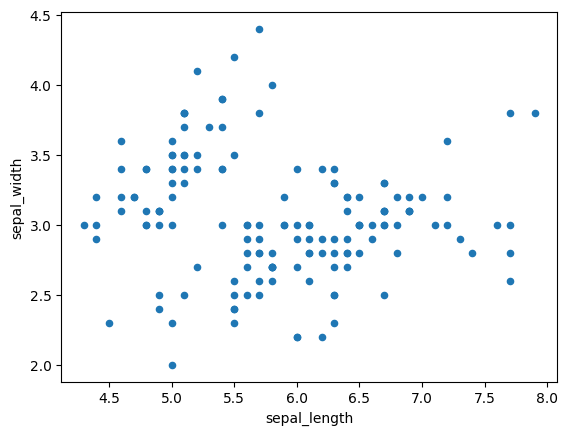

In [ ]:
data.plot(kind='scatter',x='sepal_length', y='sepal_width') # Создадим точечную диаграмму

# Далее постройте аналогичную диаграмму по petal_length	и petal_width

<Axes: xlabel='petal_length', ylabel='petal_width'>

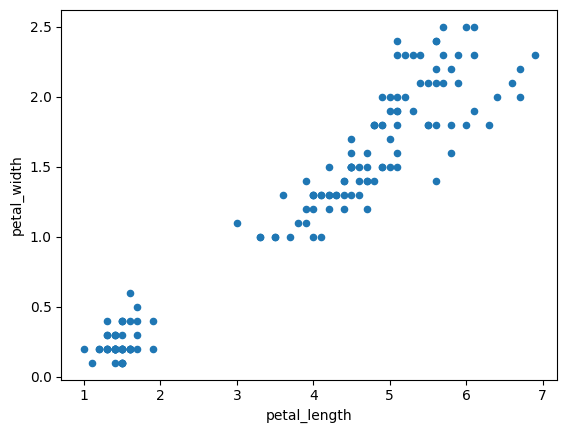

In [ ]:
data.plot(kind='scatter',x='petal_length', y='petal_width')

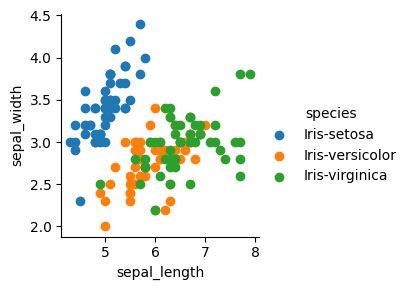

In [ ]:
# используем seaborn FacetGrid чтобы отобразить элементы каждого класса
sns.FacetGrid(data, hue = 'species') \
    .map(plt.scatter, 'sepal_length','sepal_width') \
    .add_legend()
# далее постройте аналогичную диаграмму по petal_length и	petal_width

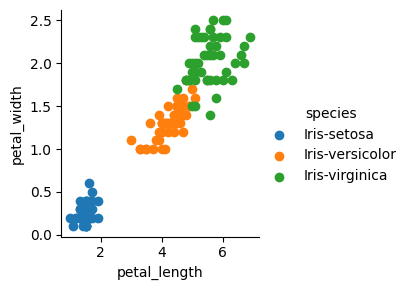

In [ ]:
sns.FacetGrid(data, hue = 'species') \
    .map(plt.scatter, 'petal_length','petal_width') \
    .add_legend()

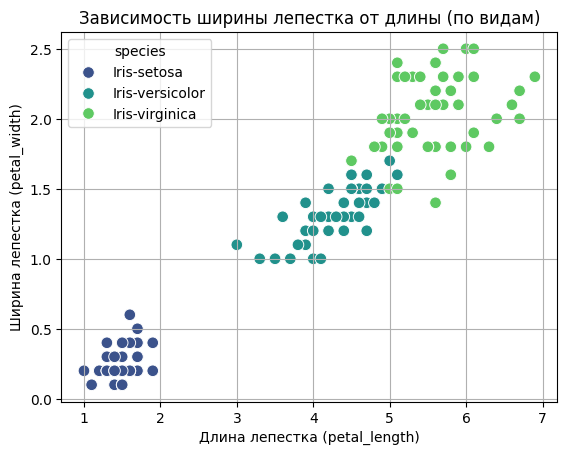

In [ ]:
sns.scatterplot(
    data=data,
    x='petal_length',
    y='petal_width',
    hue='species',  # Автоматически раскрасит по видам
    palette='viridis',  # Цветовая схема
    s=70  # Размер точек
)
plt.title('Зависимость ширины лепестка от длины (по видам)')
plt.xlabel('Длина лепестка (petal_length)')
plt.ylabel('Ширина лепестка (petal_width)')
plt.grid(True)
plt.show()

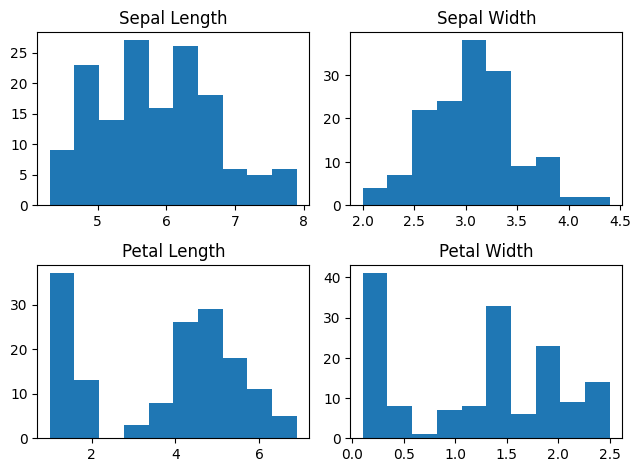

In [ ]:
# Гистограммы по каждому параметру
n_bins = 10
fig, axs = plt.subplots(2, 2)
axs[0,0].hist(data['sepal_length'], bins = n_bins);
axs[0,0].set_title('Sepal Length');
axs[0,1].hist(data['sepal_width'], bins = n_bins);
axs[0,1].set_title('Sepal Width');
axs[1,0].hist(data['petal_length'], bins = n_bins);
axs[1,0].set_title('Petal Length');
axs[1,1].hist(data['petal_width'], bins = n_bins);
axs[1,1].set_title('Petal Width');

# добавим отступы между диаграммами
fig.tight_layout(pad=1.0);

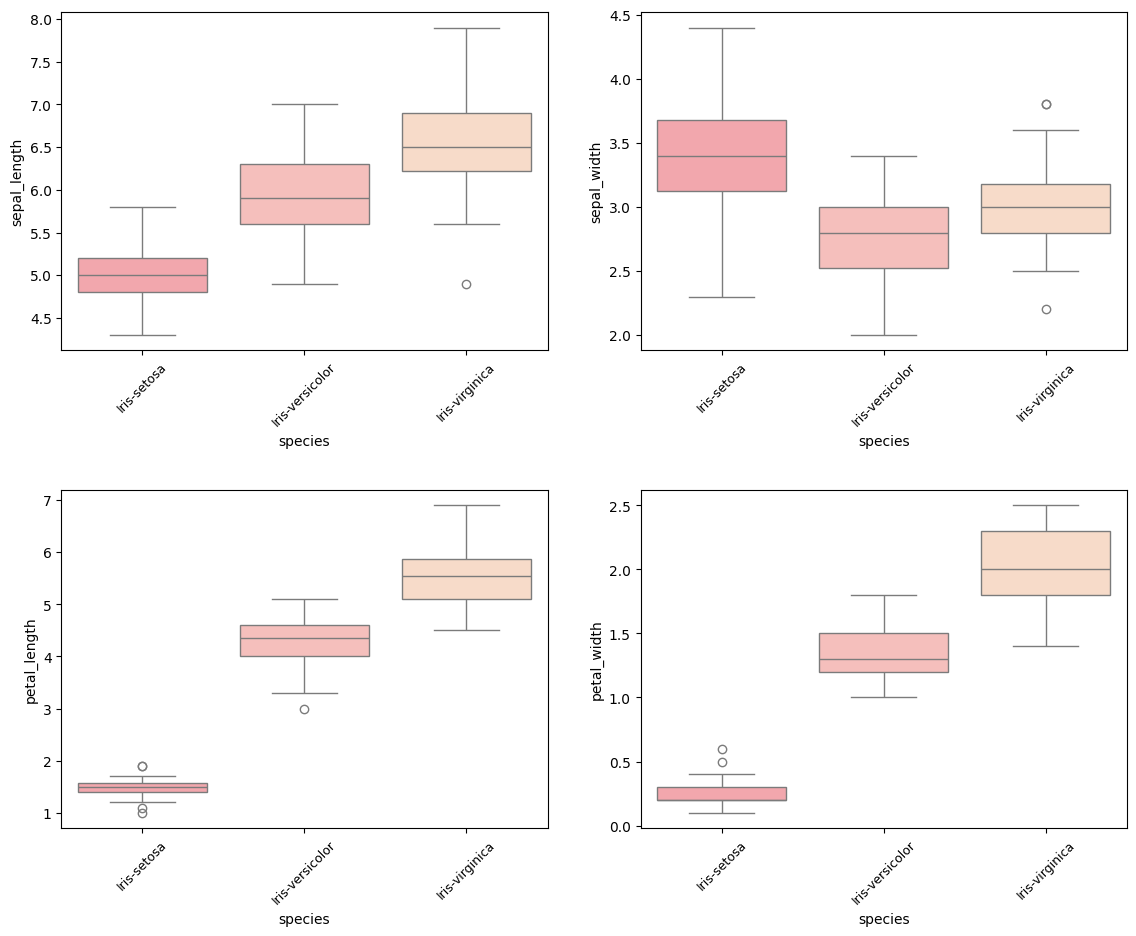

In [ ]:
# диаграмма ящик с усами seaborn
# Задаём цвета для каждого вида
species_colors = {
    "setosa": "#FF9AA2",  # Розовый
    "versicolor": "#FFB7B2",  # Светло-розовый
    "virginica": "#FFDAC1",  # Персиковый
}

# Увеличиваем размер фигуры
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fn = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
cn = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

# Строим boxplot'ы и настраиваем подписи
sns.boxplot(x='species', y='sepal_length', data=data, palette=species_colors.values(), order=cn, ax=axs[0,0])
axs[0,0].tick_params(axis='x', rotation=45, labelsize=9)  # Поворот и уменьшение шрифта
sns.boxplot(x='species', y='sepal_width', data=data, palette=species_colors.values(), order=cn, ax=axs[0,1])
axs[0,1].tick_params(axis='x', rotation=45, labelsize=9)
sns.boxplot(x='species', y='petal_length', data=data, palette=species_colors.values(), order=cn, ax=axs[1,0])
axs[1,0].tick_params(axis='x', rotation=45, labelsize=9)
sns.boxplot(x='species', y='petal_width', data=data, palette=species_colors.values(), order=cn, ax=axs[1,1])
axs[1,1].tick_params(axis='x', rotation=45, labelsize=9)

# Увеличиваем отступы между графиками
fig.tight_layout(pad=3.0)

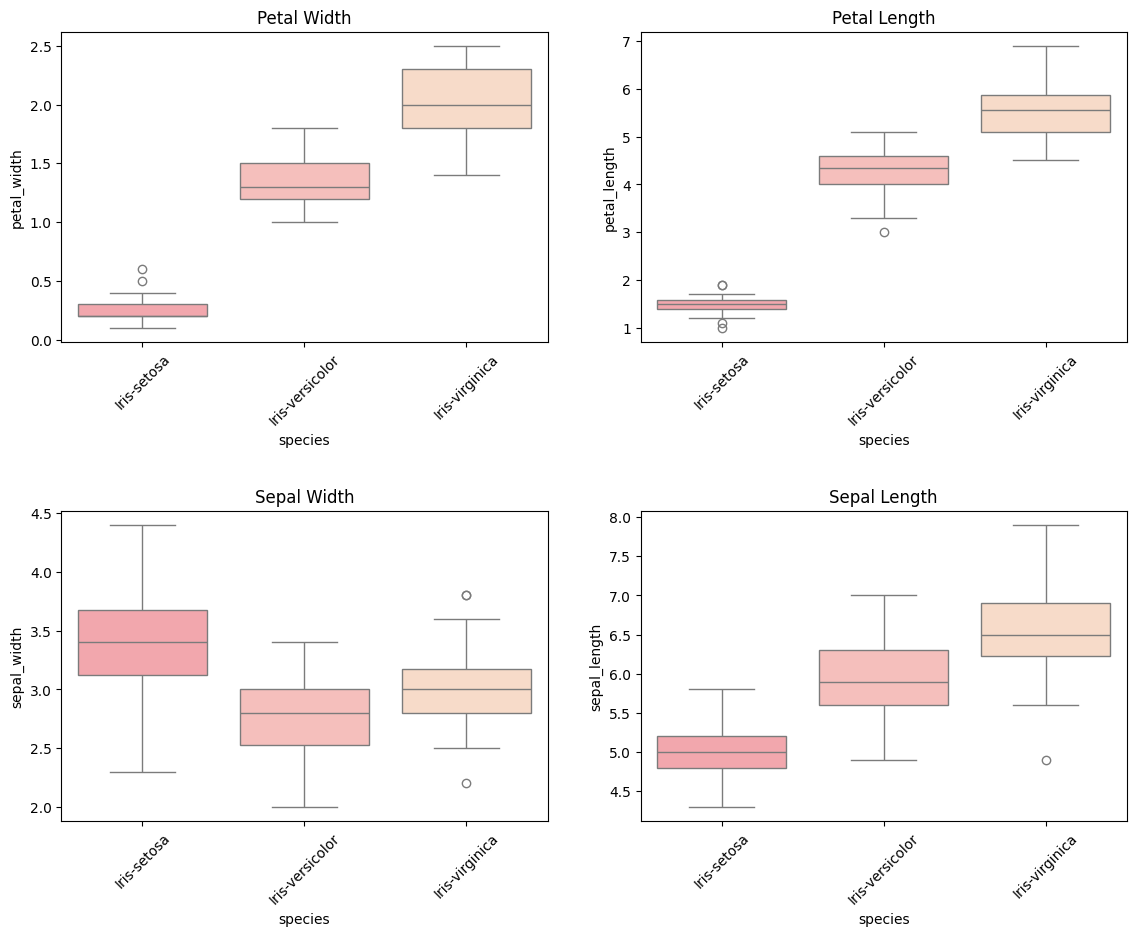

In [ ]:
# Создаем фигуру с увеличенным размером
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Определяем параметры и порядок категорий
fn = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
cn = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

# Строим boxplot'ы с настройками подписей
sns.boxplot(x='species', y='petal_width', data=data,
            palette=species_colors.values(), order=cn, ax=axs[0,0])
axs[0,0].tick_params(axis='x', rotation=45)  # Поворот подписей на 45°
sns.boxplot(x='species', y='petal_length', data=data,
            palette=species_colors.values(), order=cn, ax=axs[0,1])
axs[0,1].tick_params(axis='x', rotation=45)
sns.boxplot(x='species', y='sepal_width', data=data,
            palette=species_colors.values(), order=cn, ax=axs[1,0])
axs[1,0].tick_params(axis='x', rotation=45)
sns.boxplot(x='species', y='sepal_length', data=data,
            palette=species_colors.values(), order=cn, ax=axs[1,1])
axs[1,1].tick_params(axis='x', rotation=45)

# Добавляем заголовки для каждого подграфика
axs[0,0].set_title('Petal Width')
axs[0,1].set_title('Petal Length')
axs[1,0].set_title('Sepal Width')
axs[1,1].set_title('Sepal Length')

# Увеличиваем отступы между графиками
fig.tight_layout(pad=3.0)

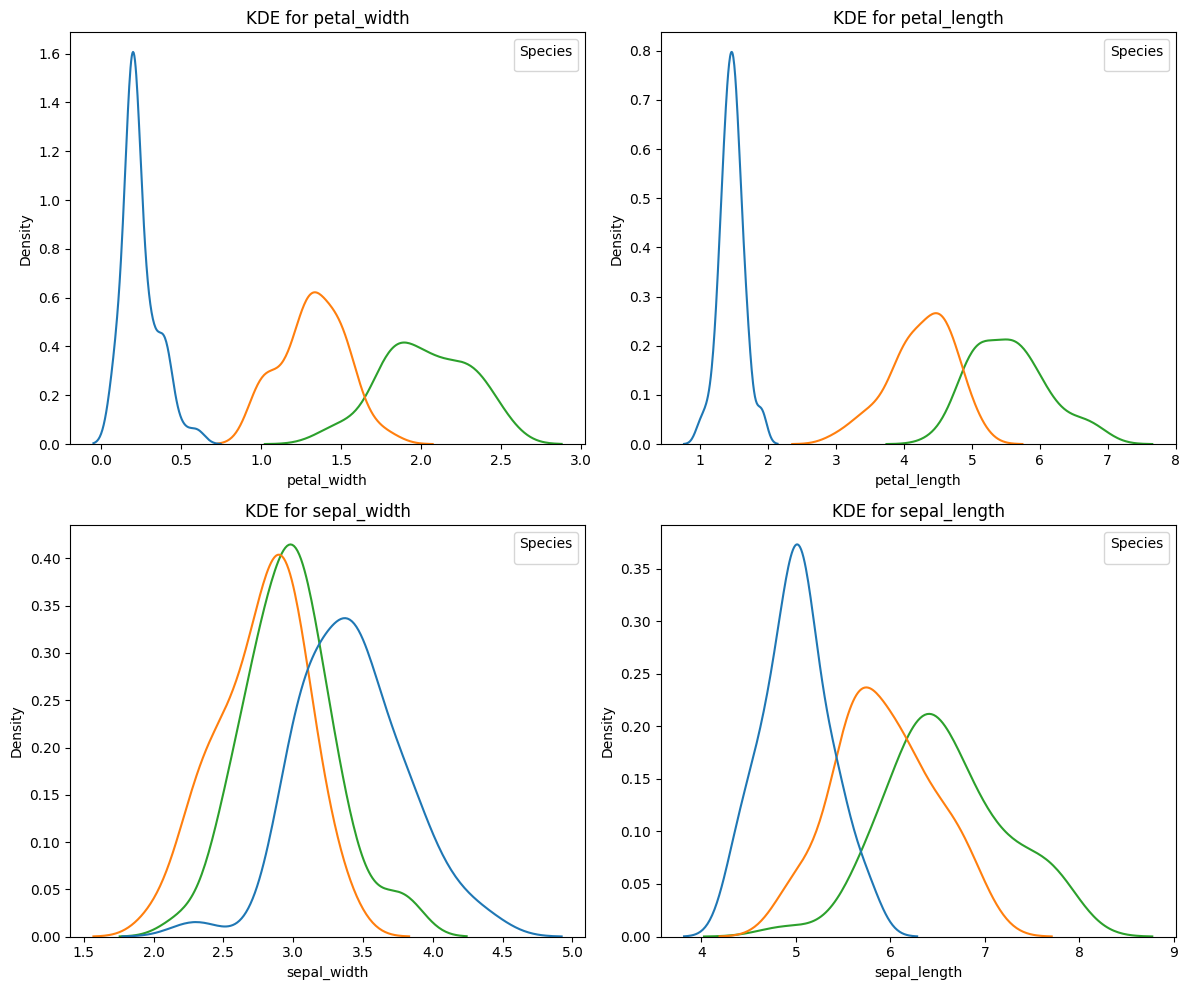

In [ ]:
# Создаем фигуру с 4 subplots (2 строки, 2 столбца)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Список переменных для анализа
variables = ['petal_width', 'petal_length', 'sepal_width', 'sepal_length']

# Строим KDE для каждой переменной
for var, ax in zip(variables, axes.flat):
    sns.kdeplot(data=data, x=var, hue='species', ax=ax)
    ax.set_title(f'KDE for {var}')
    ax.legend(title='Species')

plt.tight_layout()
plt.show()

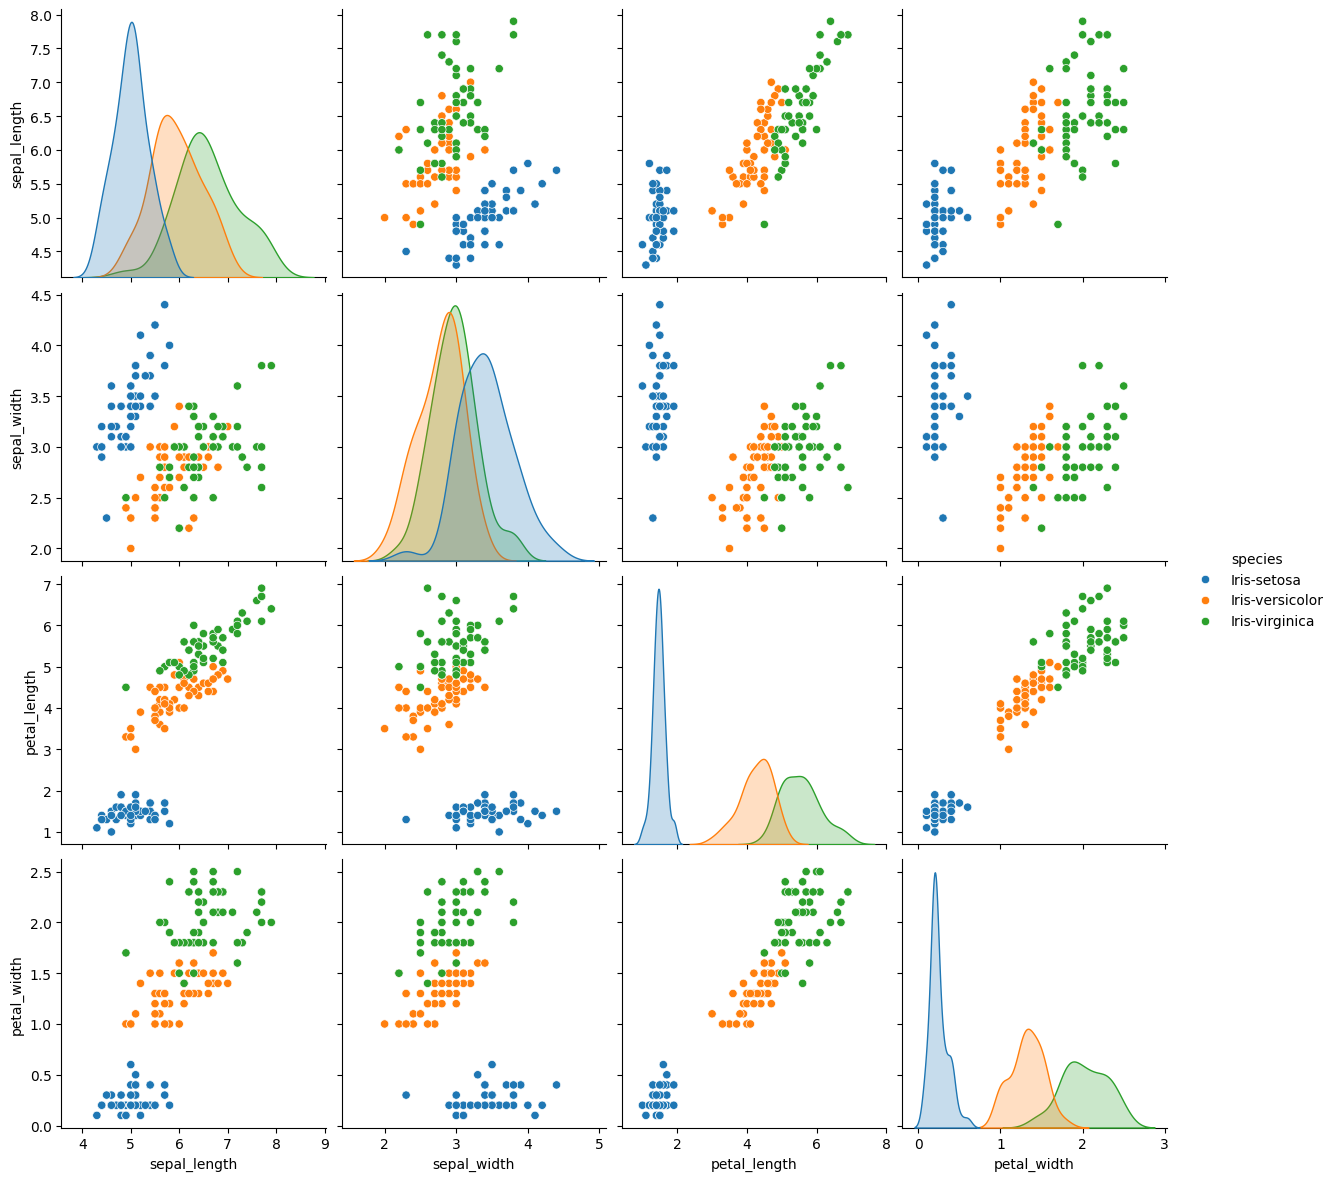

In [ ]:
# двумерная связь
# матрица диаграммы рассеяния
sns.pairplot(data, hue='species', size=3)

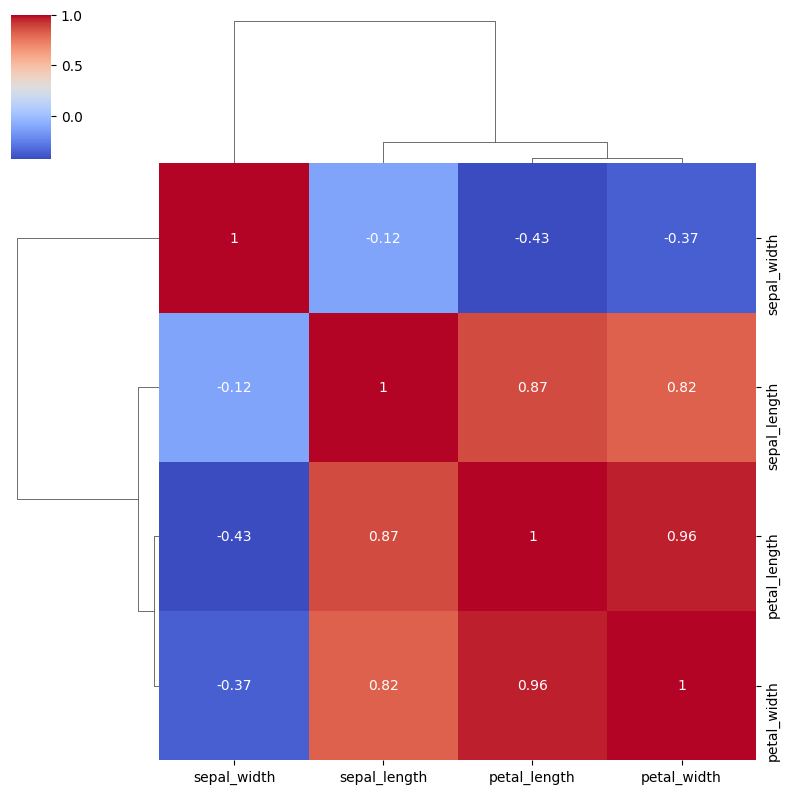

In [ ]:
# Загрузка данных
data = sns.load_dataset("iris")

# Выбираем только числовые столбцы (исключаем 'species')
numeric_data = data.select_dtypes(include=['float64'])

# Считаем корреляционную матрицу
corrmat = numeric_data.corr()

# Корреляционная матрица
sns.clustermap(
    corrmat,
    annot=True,
    cmap="coolwarm",
    figsize=(8, 8),
)
plt.show()

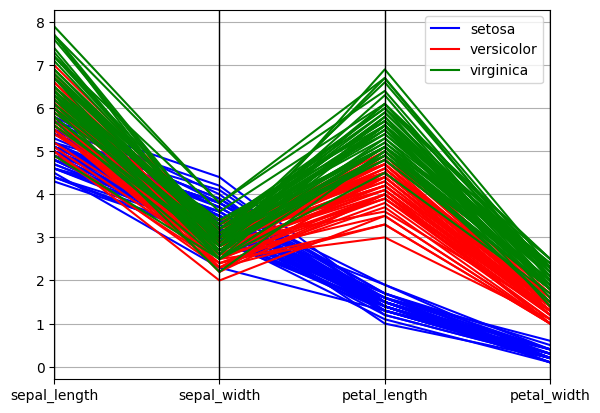

In [ ]:
# parallel coordinates
pd.plotting.parallel_coordinates(data, "species", color = ['blue', 'red', 'green']);

## Вывод

Набор данных Ирисы не содержит выбросов, пропусков и других ошибок. Из анализа данных, можно сделать вывод, что для этого набора можно решить задачу классификации и построить модель машинного обучения.

# Для датасета с тестовыми данными:

In [ ]:
# Читаем данные
link = "https://raw.githubusercontent.com/polinamynko/mo2025/refs/heads/main/data/Training_Data%20-%20Training_Data.csv"
df = pd.read_csv(link, decimal=',')  # Указываем, что разделитель — запятая
df.head(5)

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,very_low
1,0.08,0.08,0.10,0.24,0.90,High
2,0.06,0.06,0.05,0.25,0.33,Low
3,0.10,0.10,0.15,0.65,0.30,Middle
4,0.08,0.08,0.08,0.98,0.24,Low


In [ ]:
# Типы полей
df.dtypes

,0
STG,float64
SCG,float64
STR,float64
LPR,float64
PEG,float64
UNS,object


In [ ]:
# Описательная статистика, применяется для числовых полей
df.describe()

,STG,SCG,STR,LPR,PEG
count,258.000000,258.000000,258.000000,258.000000,258.000000
mean,0.371147,0.355674,0.468004,0.432713,0.458539
std,0.210271,0.211962,0.245940,0.248108,0.255211
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.240750,0.210000,0.291250,0.250000,0.250000
50%,0.327000,0.302500,0.490000,0.330000,0.500000
75%,0.495000,0.497500,0.690000,0.647500,0.660000
max,0.990000,0.900000,0.950000,0.990000,0.930000


In [ ]:
# Найдите описательную статистику по каждоу классу отдельно (нужно использовать фильтр данных в pandas)
stats_by_uns = df.groupby(' UNS').describe()
print(stats_by_uns)

           STG                                                            SCG  \
         count      mean       std   min      25%     50%     75%   max count   
 UNS                                                                            
High      63.0  0.421651  0.239661  0.00  0.26900  0.4000  0.4950  0.99  63.0   
Low       83.0  0.321145  0.173991  0.02  0.20000  0.2950  0.3950  0.73  83.0   
Middle    88.0  0.399977  0.213585  0.06  0.25350  0.3775  0.5700  0.80  88.0   
very_low  24.0  0.305792  0.187292  0.00  0.22125  0.2775  0.3825  0.68  24.0   

                    ...     LPR         PEG                                   \
              mean  ...     75%   max count      mean       std   min    25%   
 UNS                ...                                                        
High      0.423190  ...  0.7750  0.99  63.0  0.772540  0.107568  0.47  0.710   
Low       0.337000  ...  0.7100  0.98  83.0  0.237627  0.072992  0.01  0.190   
Middle    0.367920  ...  0.4225 

In [ ]:
# Количество объектов каждого класса
df.groupby(' UNS').size()

,0
UNS,
High,63
Low,83
Middle,88
very_low,24


<Axes: xlabel='STR', ylabel='LPR'>

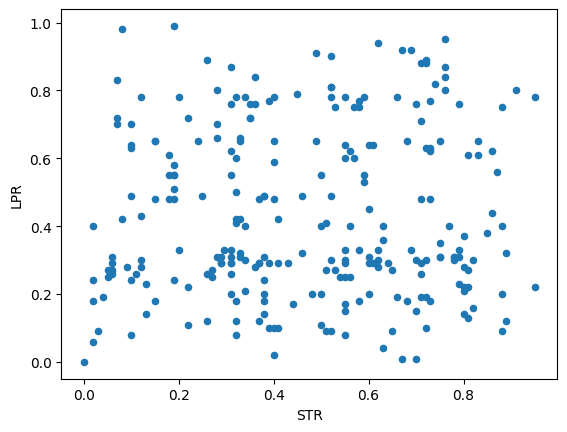

In [ ]:
df.plot(kind='scatter',x='STR', y='LPR') # создадим точечную диаграмму

<Axes: xlabel='SCG', ylabel='PEG'>

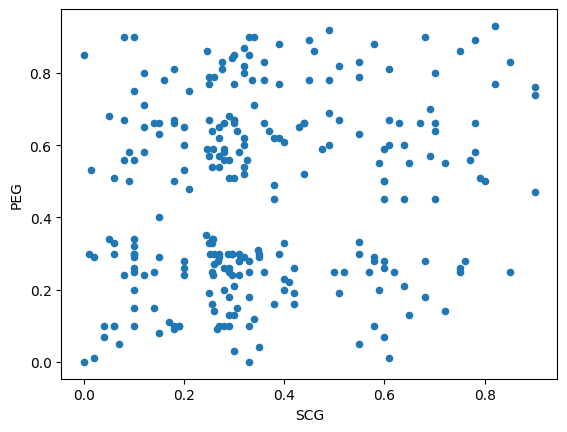

In [ ]:
df.plot(kind='scatter',x='SCG', y='PEG')

<Axes: xlabel='STG', ylabel='PEG'>

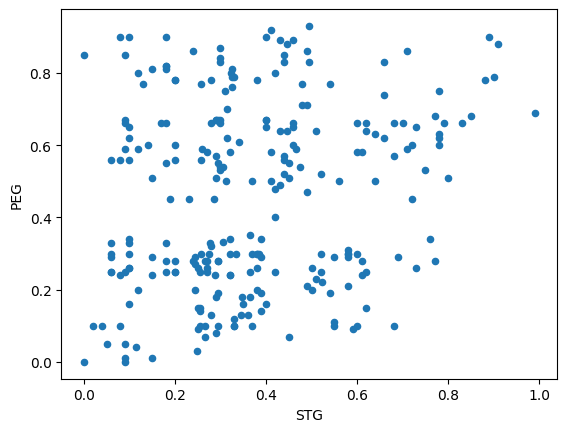

In [ ]:
df.plot(kind='scatter',x='STG', y='PEG')

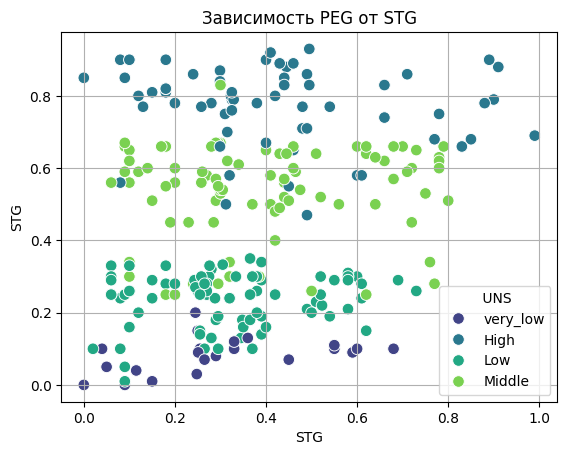

In [ ]:
# Аналогичная диаграмма по другим признакам

sns.scatterplot(
    data=df,
    x='STG',
    y='PEG',
    hue=' UNS',  # Автоматически раскрасит по видам
    palette='viridis',  # Цветовая схема
    s=70  # Размер точек
)
plt.title('Зависимость PEG от STG')
plt.xlabel('STG')
plt.ylabel('STG')
plt.grid(True)
plt.show()

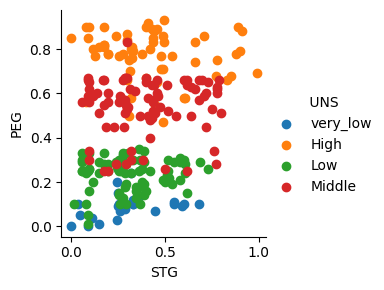

In [ ]:
# используем seaborn FacetGrid чтобы отобразить элементы каждого класса
sns.FacetGrid(df, hue = ' UNS') \
    .map(plt.scatter, 'STG','PEG') \
    .add_legend()

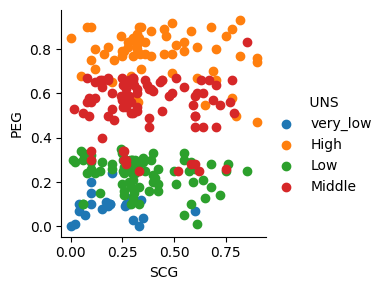

In [ ]:
# Аналогичная диаграмма по другим признакам
sns.FacetGrid(df, hue = ' UNS') \
    .map(plt.scatter, 'SCG','PEG') \
    .add_legend()

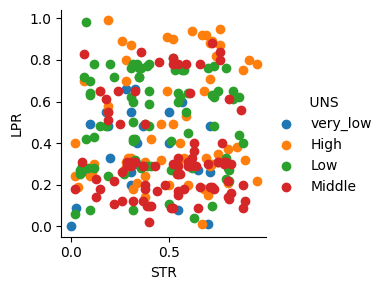

In [ ]:
# Аналогичная диаграмма по другим признакам
sns.FacetGrid(df, hue = ' UNS') \
    .map(plt.scatter, 'STR','LPR') \
    .add_legend()

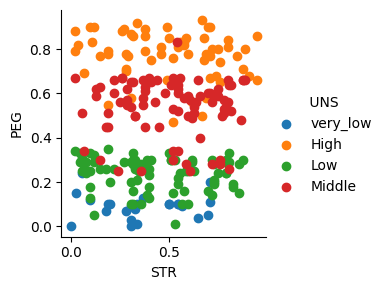

In [ ]:
# Аналогичная диаграмма по другим признакам
sns.FacetGrid(df, hue = ' UNS') \
    .map(plt.scatter, 'STR','PEG') \
    .add_legend()

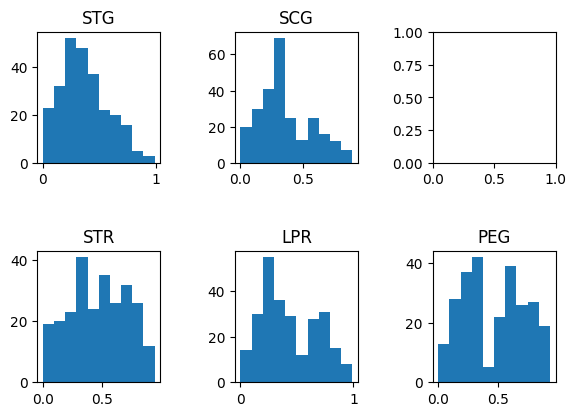

In [ ]:
# Гистограммы по каждому параметру
n_bins = 10
fig, axs = plt.subplots(2, 3)
axs[0,0].hist(df['STG'], bins = n_bins);
axs[0,0].set_title('STG');
axs[0,1].hist(df['SCG'], bins = n_bins);
axs[0,1].set_title('SCG');
axs[1,0].hist(df['STR'], bins = n_bins);
axs[1,0].set_title('STR');
axs[1,1].hist(df['LPR'], bins = n_bins);
axs[1,1].set_title('LPR');
axs[1,2].hist(df['PEG'], bins = n_bins);
axs[1,2].set_title('PEG');

# добавим отступы между диаграммами
fig.tight_layout(pad=3.0);

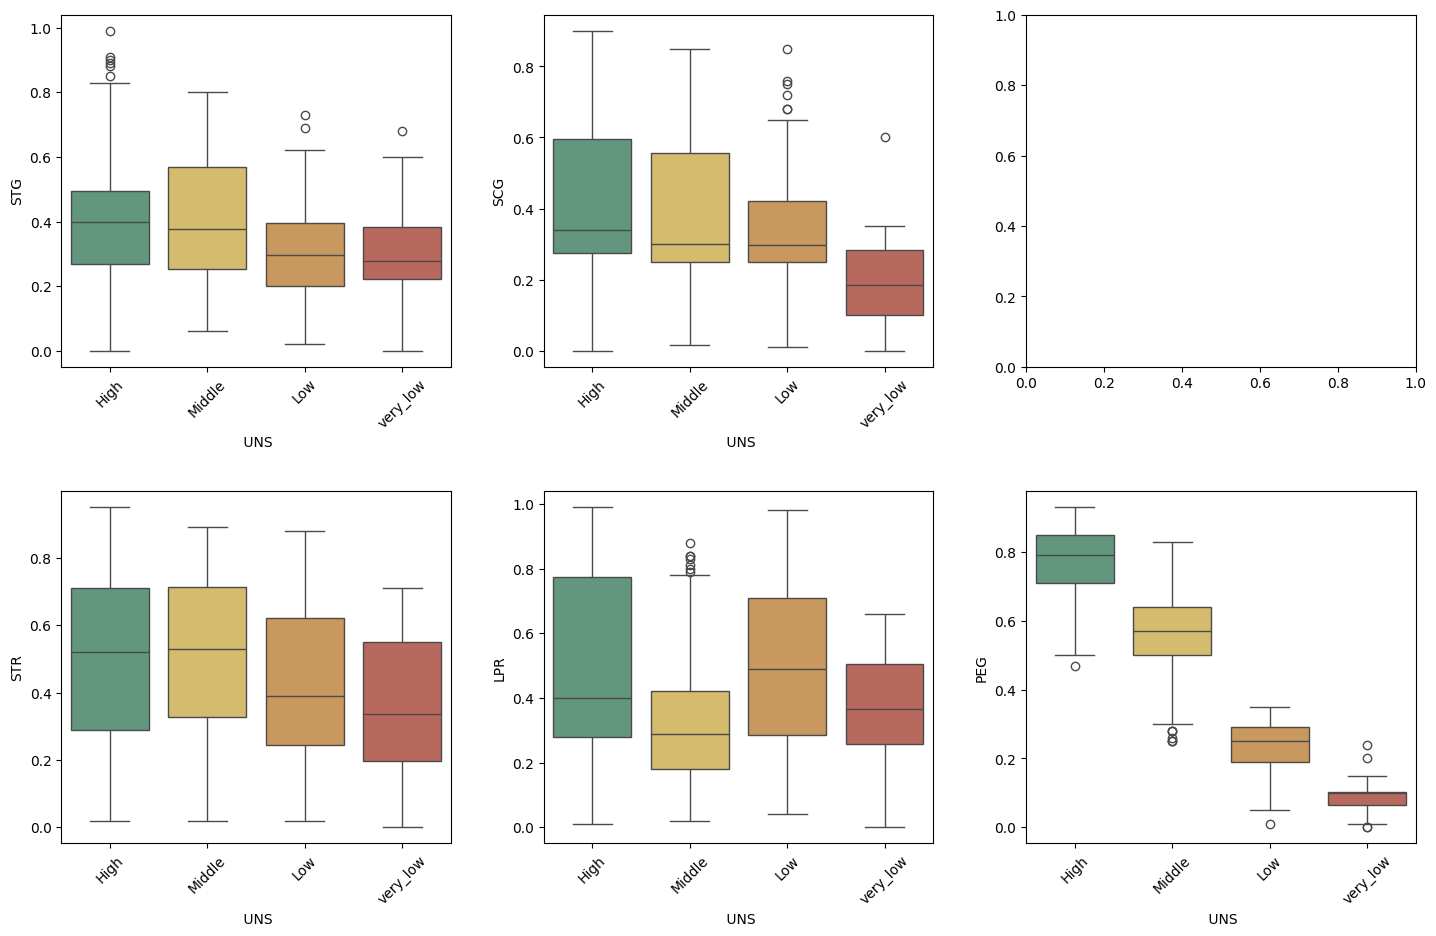

In [ ]:
# диаграмма ящик с усами seaborn
# Задаём цвета для каждого вида
uns_colors = {
    "High": "#5a9e7f",  # Зеленый
    "Middle": "#e6c35c",  # Желтый
    "Low": "#d99a4e",  # Оранжевый
    "very_low": "#c75d4f",  # Красный
}

# Увеличиваем размер фигуры
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
fn = ["STG", "SCG", "STR", "LPR", "PEG"]
cn = ["High", "Middle", "Low", "very_low"]

# Создаем боксплоты и поворачиваем метки оси X
sns.boxplot(x=' UNS', y="STG", data=df, palette=uns_colors.values(), order=cn, ax=axs[0,0])
axs[0,0].tick_params(axis='x', rotation=45)
sns.boxplot(x=' UNS', y="SCG", data=df, palette=uns_colors.values(), order=cn, ax=axs[0,1])
axs[0,1].tick_params(axis='x', rotation=45)
sns.boxplot(x=' UNS', y="STR", data=df, palette=uns_colors.values(), order=cn, ax=axs[1,0])
axs[1,0].tick_params(axis='x', rotation=45)
sns.boxplot(x=' UNS', y="LPR", data=df, palette=uns_colors.values(), order=cn, ax=axs[1,1])
axs[1,1].tick_params(axis='x', rotation=45)
sns.boxplot(x=' UNS', y="PEG", data=df, palette=uns_colors.values(), order=cn, ax=axs[1,2])
axs[1,2].tick_params(axis='x', rotation=45)

# Увеличиваем отступы между и вокруг сабплотоа
fig.tight_layout(pad=3.0)

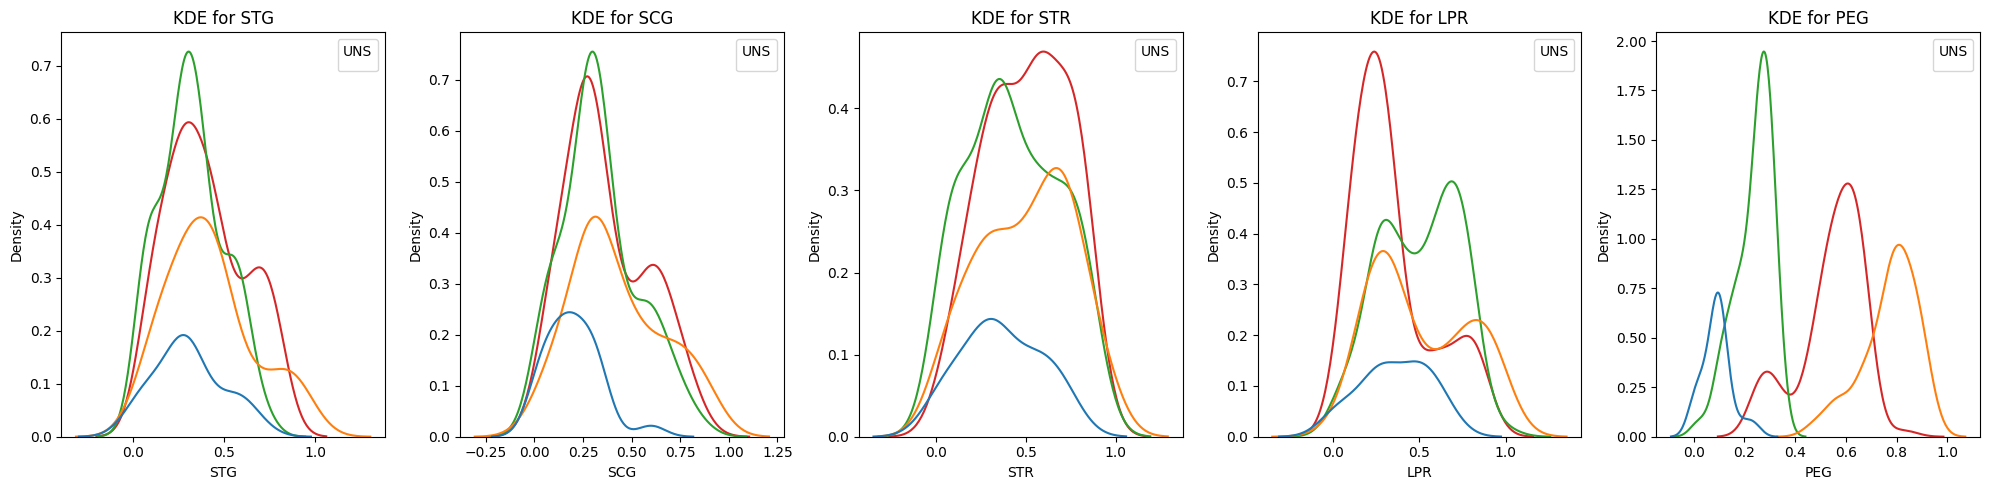

In [ ]:
# Создаем фигуру с 5 subplots в одном ряду
fig, axes = plt.subplots(1, 5, figsize=(20, 5))

# Список переменных для построения
variables = ["STG", "SCG", "STR", "LPR", "PEG"]

# Строим KDE plot для каждой переменной в своем subplot
for var, ax in zip(variables, axes):
    sns.kdeplot(data=df, x=var, hue=' UNS', ax=ax)
    ax.set_title(f'KDE for {var}')
    ax.legend(title='UNS')

# Регулируем отступы
plt.tight_layout()
plt.show()

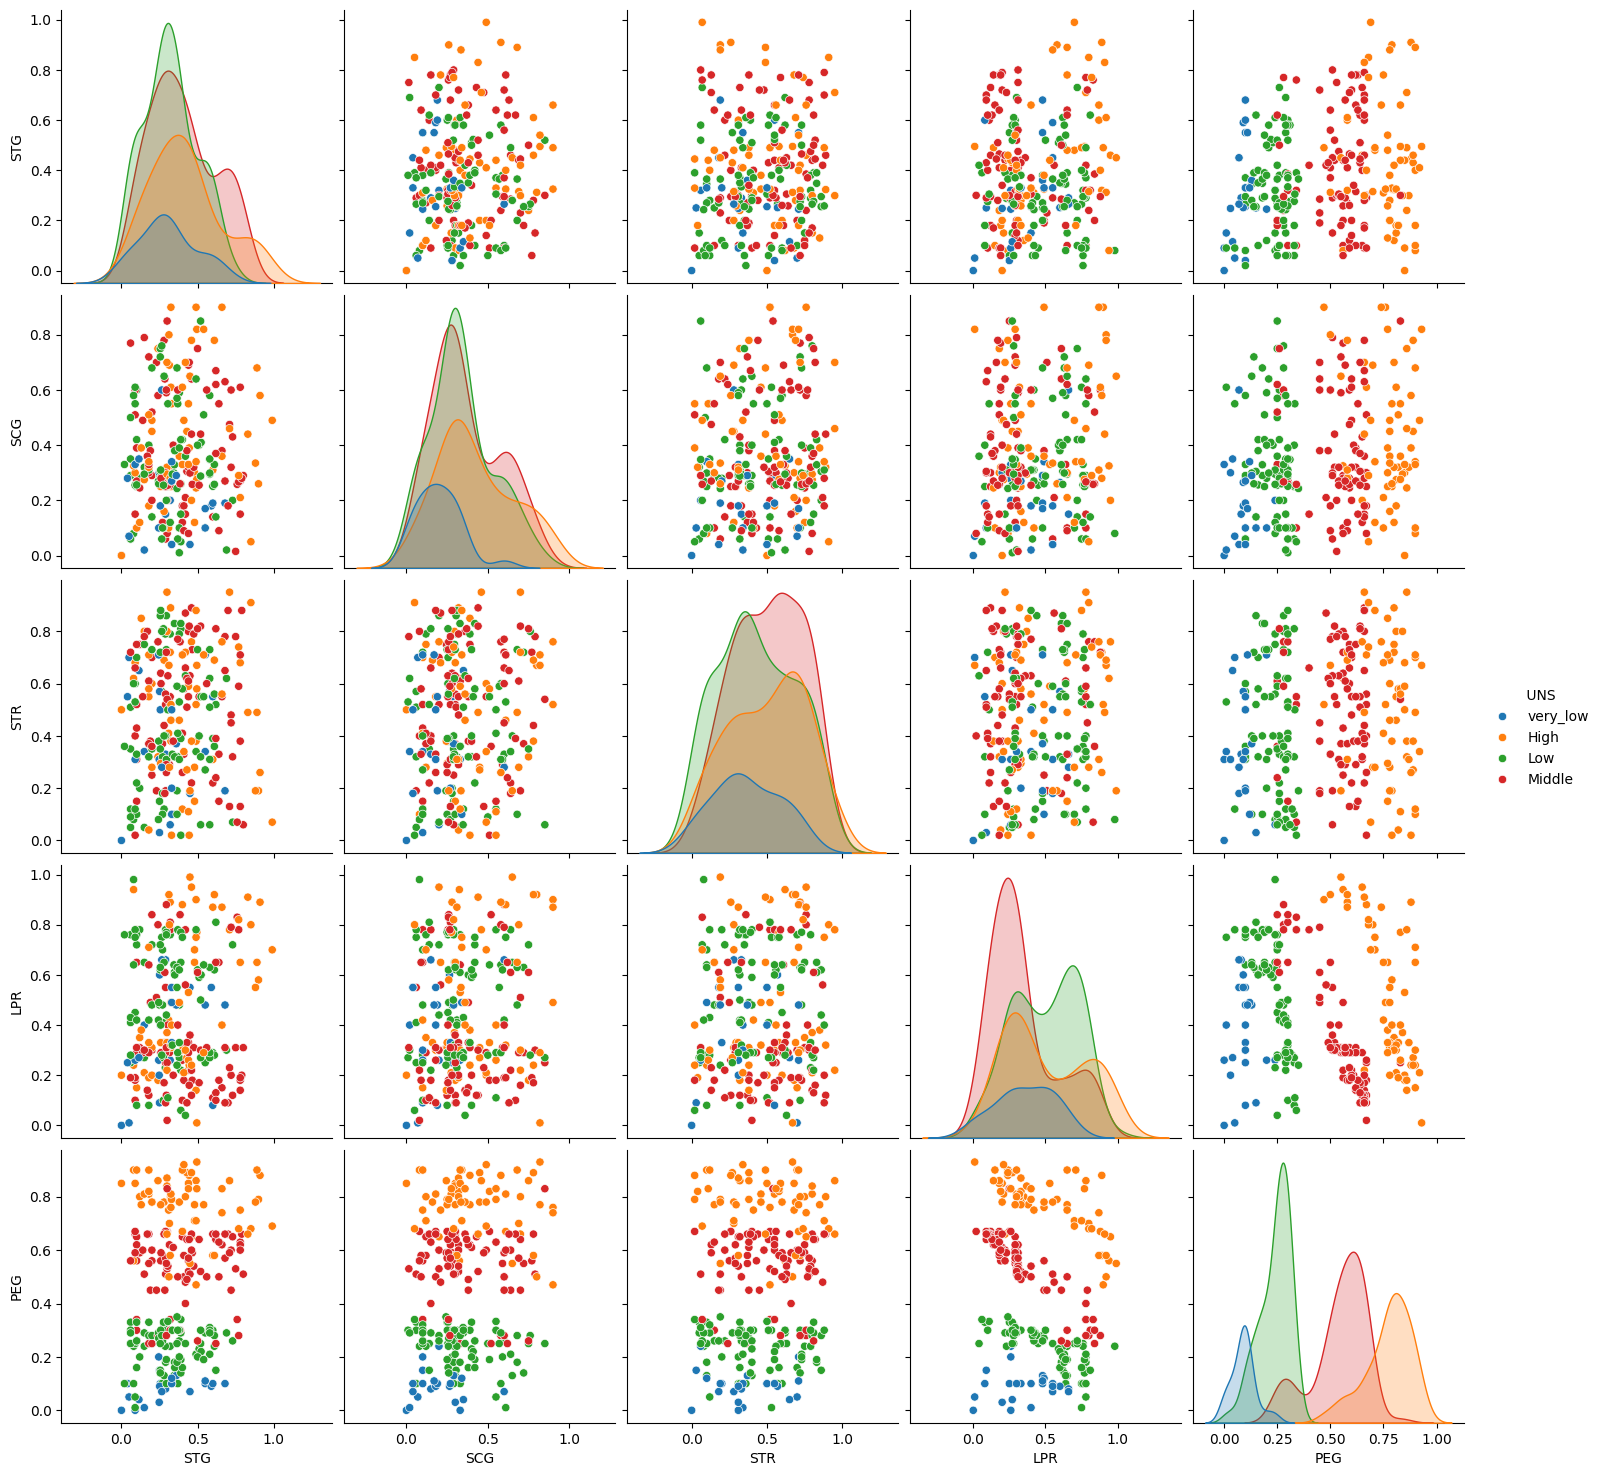

In [ ]:
# двумерная связь
# матрица диаграммы рассеяния
sns.pairplot(df, hue=' UNS', size=3)

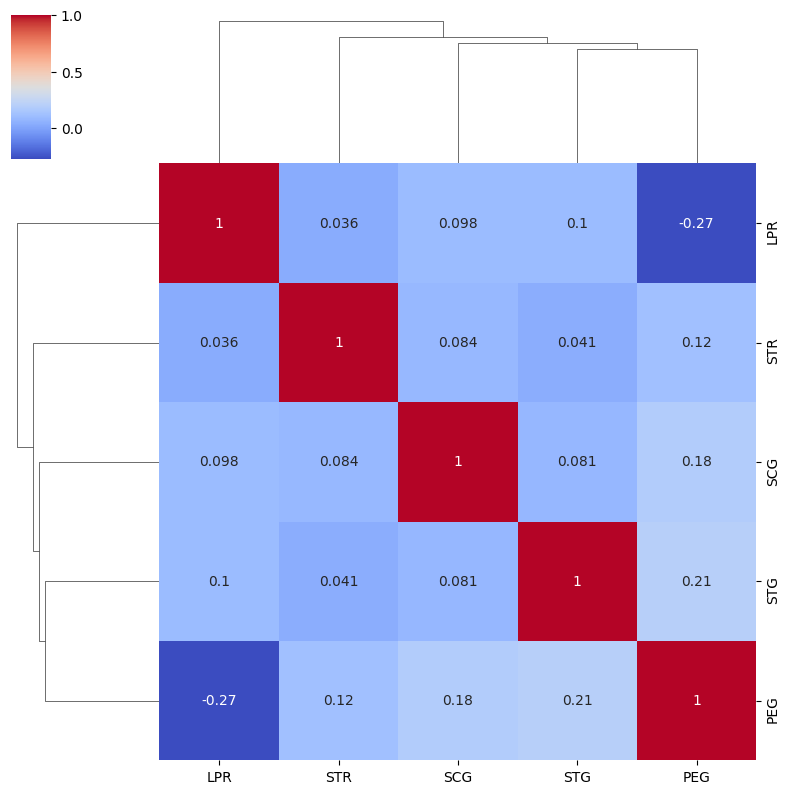

In [ ]:
# Загрузка данных
data = df

# Выбираем только числовые столбцы (исключаем 'UNS')
numeric_data = data.select_dtypes(include=['float64'])

# Считаем корреляционную матрицу
corrmat = numeric_data.corr()

# Корреляционная матрица
sns.clustermap(
    corrmat,
    annot=True,
    cmap="coolwarm",
    figsize=(8, 8),
)
plt.show()

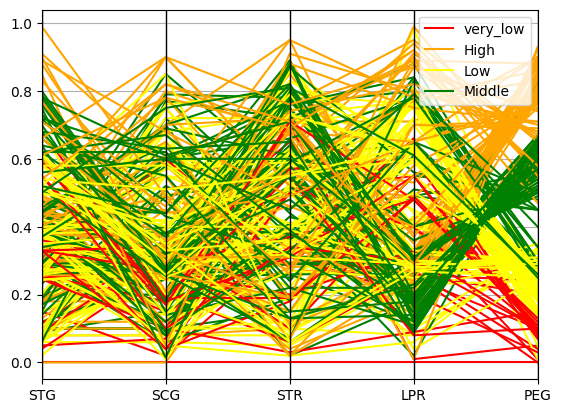

In [ ]:
# parallel coordinates
pd.plotting.parallel_coordinates(df, " UNS", color = ['red', 'orange', 'yellow', 'green']);